In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

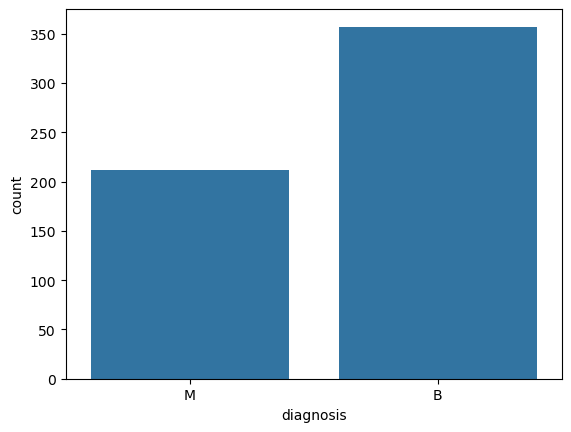

In [7]:
sns.countplot(x='diagnosis', data=df)

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

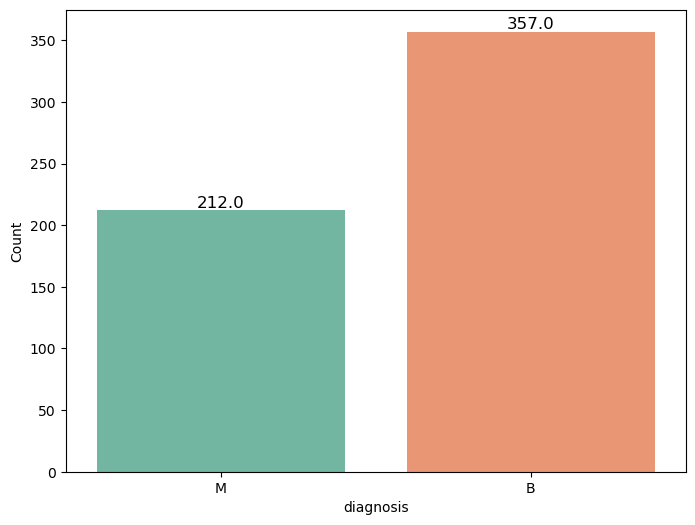

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.20)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
486,B
75,M
249,B
238,B


In [14]:
ytest.shape

(114, 1)

In [15]:
xtest.shape

(114, 30)

# Test and Validation

In [16]:
x_test, x_val, y_test, y_val = train_test_split(xtest, ytest, random_state=42, test_size=.50)
x_test.shape #15% of total data

(57, 30)

In [17]:
x_val.shape #15% of total data ; for hyper param tuning

(57, 30)

# Step 3: Decision Tree model and evaluation

In [18]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [19]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M'], dtype=object)

# Evaluate Decision Tree model performance

In [20]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9385964912280702 

Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# Step 4: Random Forest model and evaluation

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [22]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

# Evaluate Random Forest model performance

In [23]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.9649122807017544 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [24]:
# Define hyperparameters for Decision Tree 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12, 15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [25]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                              param_grid = dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25,
                                       28],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [26]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00491605, 0.00140004, 0.00440111, ..., 0.00167756, 0.00501223,
        0.00191779]),
 'std_fit_time': array([0.00051828, 0.00048965, 0.00038698, ..., 0.00043961, 0.00066797,
        0.00021854]),
 'mean_score_time': array([0.00160642, 0.00159988, 0.00142245, ..., 0.00141187, 0.00203547,
        0.00176558]),
 'std_score_time': array([4.92523584e-04, 4.89765167e-04, 4.73471816e-04, ...,
        4.32877736e-04, 4.58948272e-05, 4.01707603e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
              mask=

In [27]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004916,0.000518,0.001606,0.000493,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.923077,0.890110,0.934066,0.901099,0.934066,0.916484,0.017855,1755
1,0.001400,0.000490,0.001600,0.000490,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.934066,0.934066,0.923077,0.934066,0.879121,0.920879,0.021308,1666
2,0.004401,0.000387,0.001422,0.000473,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.923077,0.890110,0.934066,0.901099,0.934066,0.916484,0.017855,1755
3,0.001377,0.000783,0.001367,0.000679,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.934066,0.945055,0.956044,0.923077,0.923077,0.936264,0.012815,297
4,0.004398,0.000807,0.001200,0.000406,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.923077,0.890110,0.967033,0.890110,0.934066,0.920879,0.028991,1666


In [28]:
tuning_result_dt_gs.shape

(1980, 18)

In [29]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'random'}

In [30]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
299,0.002034,0.000055,0.001309,0.000400,gini,6,2,7,random,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.956044,0.923077,0.989011,0.945055,0.945055,0.951648,0.021534,1
1015,0.001655,0.000562,0.001931,0.000416,entropy,None,2,5,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.956044,0.956044,0.956044,0.956044,0.934066,0.951648,0.008791,1
279,0.001806,0.000403,0.001328,0.000418,gini,6,1,6,random,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.945055,0.956044,0.934066,0.967033,0.956044,0.951648,0.011207,1
1555,0.001430,0.000466,0.001947,0.000103,entropy,12,2,5,random,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.956044,0.956044,0.956044,0.956044,0.934066,0.951648,0.008791,1
1915,0.001806,0.000410,0.001416,0.000478,entropy,28,2,5,random,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.956044,0.956044,0.956044,0.956044,0.934066,0.951648,0.008791,1


# Perform Grid Search for Random Forest

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

# Evaluate the optimized models

In [31]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


# Hyperparameter optimization using Randomized Search for Decision Tree

In [32]:
# Perform Randomized Search for Decision Tree 
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42) 
dt_random_search.fit(xtrain, ytrain) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      15, 20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [33]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00883555, 0.00742598, 0.00238743, 0.00192838, 0.00501175,
        0.00201721, 0.00565867, 0.00601315, 0.00182762, 0.00216694,
        0.00447736, 0.00180545, 0.00181856, 0.00149293, 0.00865602,
        0.00642481, 0.0058166 , 0.00165067, 0.00442185, 0.00491657,
        0.0045135 , 0.00538664, 0.00206175, 0.00160184, 0.0052218 ,
        0.00175457, 0.00153852, 0.00146346, 0.00509453, 0.00478029,
        0.00180016, 0.00164342, 0.00215807, 0.00523429, 0.00181775,
        0.00182271, 0.00520186, 0.00199561, 0.00489273, 0.00485463,
        0.0032053 , 0.00548792, 0.00498195, 0.00138121, 0.00533481,
        0.00460982, 0.00545535, 0.00503969, 0.00481224, 0.00259686,
        0.00710034, 0.00454817, 0.00182061, 0.00210347, 0.00549889,
        0.00209408, 0.00422502, 0.00157399, 0.0053895 , 0.00586319,
        0.0054203 , 0.00351224, 0.00220718, 0.00502262, 0.00159593,
        0.00546474, 0.00160284, 0.00180368, 0.00436702, 0.0022006 ,
        0.00339718, 0.00200763,

In [34]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008836,0.001145,0.003569,0.000529,best,5,5,8,entropy,"{'splitter': 'best', 'min_samples_split': 5, '...",0.967033,0.901099,0.945055,0.945055,0.901099,0.931868,0.026374,36
1,0.007426,0.002033,0.002606,0.000791,best,3,4,None,gini,"{'splitter': 'best', 'min_samples_split': 3, '...",0.901099,0.912088,0.978022,0.956044,0.912088,0.931868,0.029812,36
2,0.002387,0.000423,0.001585,0.000483,random,6,5,6,gini,"{'splitter': 'random', 'min_samples_split': 6,...",0.934066,0.901099,0.956044,0.912088,0.945055,0.929670,0.020382,61
3,0.001928,0.000150,0.001618,0.000775,random,5,4,15,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.934066,0.945055,0.890110,0.934066,0.945055,0.929670,0.020382,61
4,0.005012,0.000631,0.002005,0.000604,best,3,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.967033,0.912088,0.956044,0.923077,0.912088,0.934066,0.023051,26


In [35]:
dt_random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [36]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [37]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000199,0.000399,0.000000,0.000000,251,810,1,auto,None,gini,"{'n_estimators': 251, 'min_samples_split': 810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,0.119647,0.011926,0.004794,0.000903,151,810,3,sqrt,4,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,57
2,0.209131,0.013577,0.008358,0.003507,201,4,1,log2,2,entropy,"{'n_estimators': 201, 'min_samples_split': 4, ...",0.934066,0.934066,0.967033,0.923077,0.934066,0.938462,0.014906,52
3,0.272054,0.011826,0.007013,0.000628,251,3,3,log2,20,gini,"{'n_estimators': 251, 'min_samples_split': 3, ...",0.967033,0.934066,0.978022,0.956044,0.934066,0.953846,0.017582,28
4,0.000299,0.000395,0.000000,0.000000,151,810,4,auto,2,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.163967,0.004202,0.005145,0.000342,151,4,1,log2,28,gini,"{'n_estimators': 151, 'min_samples_split': 4, ...",0.967033,0.934066,0.978022,0.945055,0.956044,0.956044,0.015541,21
96,0.216154,0.013623,0.005849,0.000364,201,3,2,log2,28,gini,"{'n_estimators': 201, 'min_samples_split': 3, ...",0.978022,0.934066,0.978022,0.945055,0.934066,0.953846,0.020143,28
97,0.213579,0.010250,0.010060,0.004269,301,810,1,sqrt,20,gini,"{'n_estimators': 301, 'min_samples_split': 810...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,57
98,0.000605,0.000494,0.000000,0.000000,201,7,2,auto,15,entropy,"{'n_estimators': 201, 'min_samples_split': 7, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68


In [38]:
rf_random_search.best_params_

{'n_estimators': 101,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [39]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Random Forest Randomized Search

In [40]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Post Pruning for Decision Tree

In [41]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, random_state=42, splitter='random')

[Text(0.5, 0.95, 'concave points_mean <= 0.04\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.85, 'radius_worst <= 17.727\nentropy = 0.276\nsamples = 252\nvalue = [240, 12]'),
 Text(0.15384615384615385, 0.75, 'texture_worst <= 28.676\nentropy = 0.166\nsamples = 245\nvalue = [239, 6]'),
 Text(0.07692307692307693, 0.65, 'radius_se <= 0.623\nentropy = 0.079\nsamples = 204\nvalue = [202, 2]'),
 Text(0.038461538461538464, 0.55, 'entropy = 0.0\nsamples = 201\nvalue = [201, 0]'),
 Text(0.11538461538461539, 0.55, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.23076923076923078, 0.65, 'perimeter_mean <= 77.666\nentropy = 0.461\nsamples = 41\nvalue = [37, 4]'),
 Text(0.19230769230769232, 0.55, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.2692307692307692, 0.55, 'symmetry_worst <= 0.279\nentropy = 0.702\nsamples = 21\nvalue = [17, 4]'),
 Text(0.23076923076923078, 0.45, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3076923076923077, 0.45, 'frac

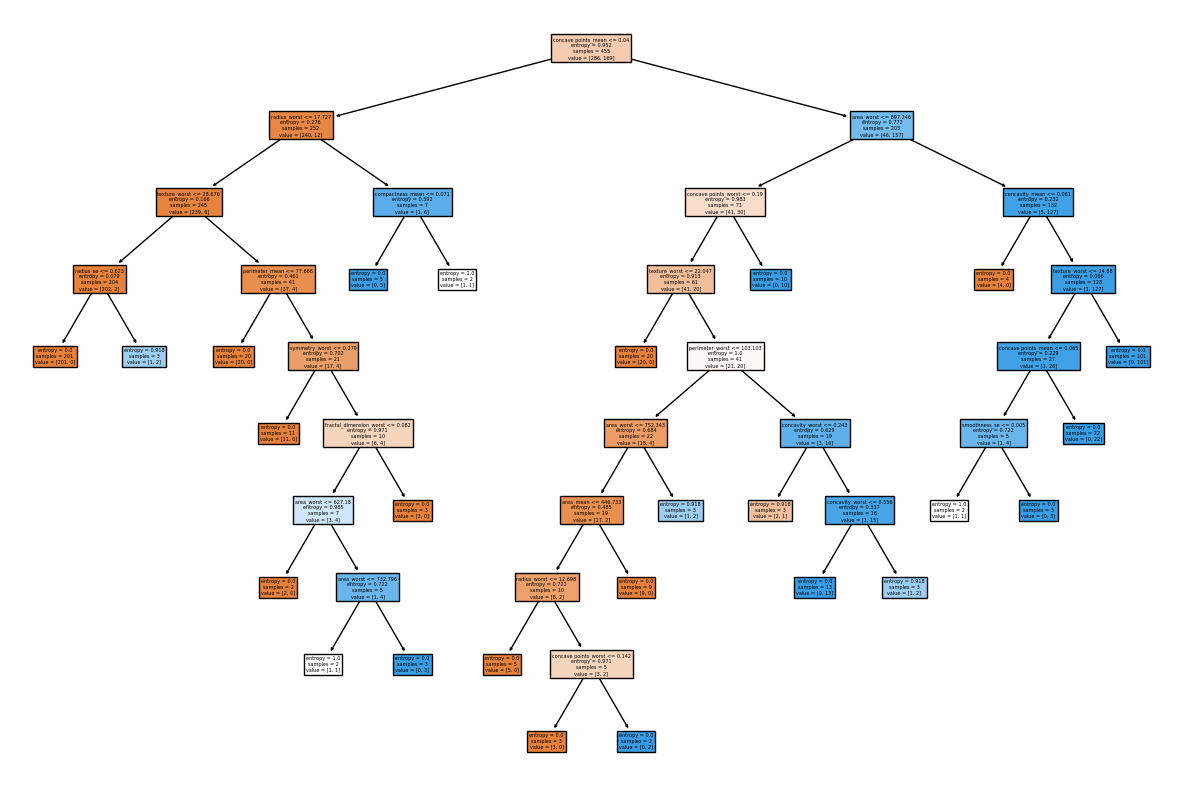

In [42]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

Read: #https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [43]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [44]:
ccp_alpha_values 

array([0.        , 0.00353767, 0.00353767, 0.00470705, 0.00530484,
       0.00580605, 0.00670315, 0.00675492, 0.00836089, 0.01011028,
       0.0208732 , 0.03072049, 0.03162999, 0.04890194, 0.0545059 ,
       0.123672  , 0.4543448 ])

In [45]:
clfs_list = []  # save models with diffrent ccp_alpha value
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [46]:
clfs_list 

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0035376713723885966, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0035376713723885966, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004707053736431412, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.005304839896151785, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.005806051788370886, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0067031488682526095, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006754922023019476, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008360893813690033, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0101102766115644, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.02087319536337382, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.030720491375640986, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.031629990125269486, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.04890194127665724, random_state=42

In [47]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [48]:
train_scores

[1.0,
 0.9934065934065934,
 0.9934065934065934,
 0.9912087912087912,
 0.9912087912087912,
 0.989010989010989,
 0.989010989010989,
 0.989010989010989,
 0.9846153846153847,
 0.9802197802197802,
 0.9582417582417583,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208,
 0.6285714285714286]

In [49]:
test_scores

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.6228070175438597]

In [50]:
import matplotlib.pyplot as plt

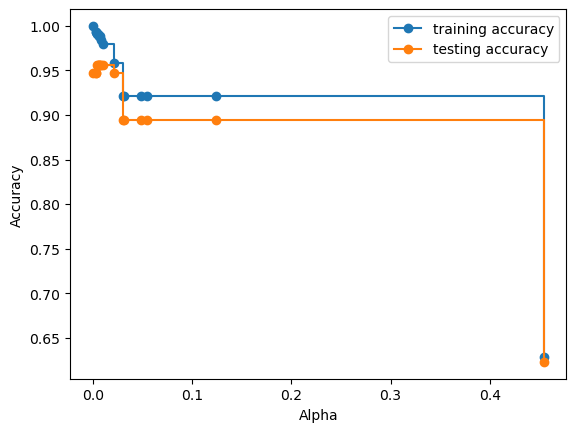

In [51]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [52]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [53]:
pred = clf.predict(xtest)
accuracy_score(ytest, pred)

0.956140350877193

In [54]:
clf.score(xtrain, ytrain)

0.9802197802197802

[Text(0.5, 0.9, 'concave points_mean <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.2, 0.7, 'radius_worst <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.1, 0.5, 'gini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.3, 0.5, 'texture_mean <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4, 0.3, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8, 0.7, 'concave points_worst <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7, 0.5, 'perimeter_worst <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.6, 0.3, 'texture_mean <= 21.055\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.9, 0.5, 'gini = 0.029\nsamples = 138\nvalue = [2, 136]')]

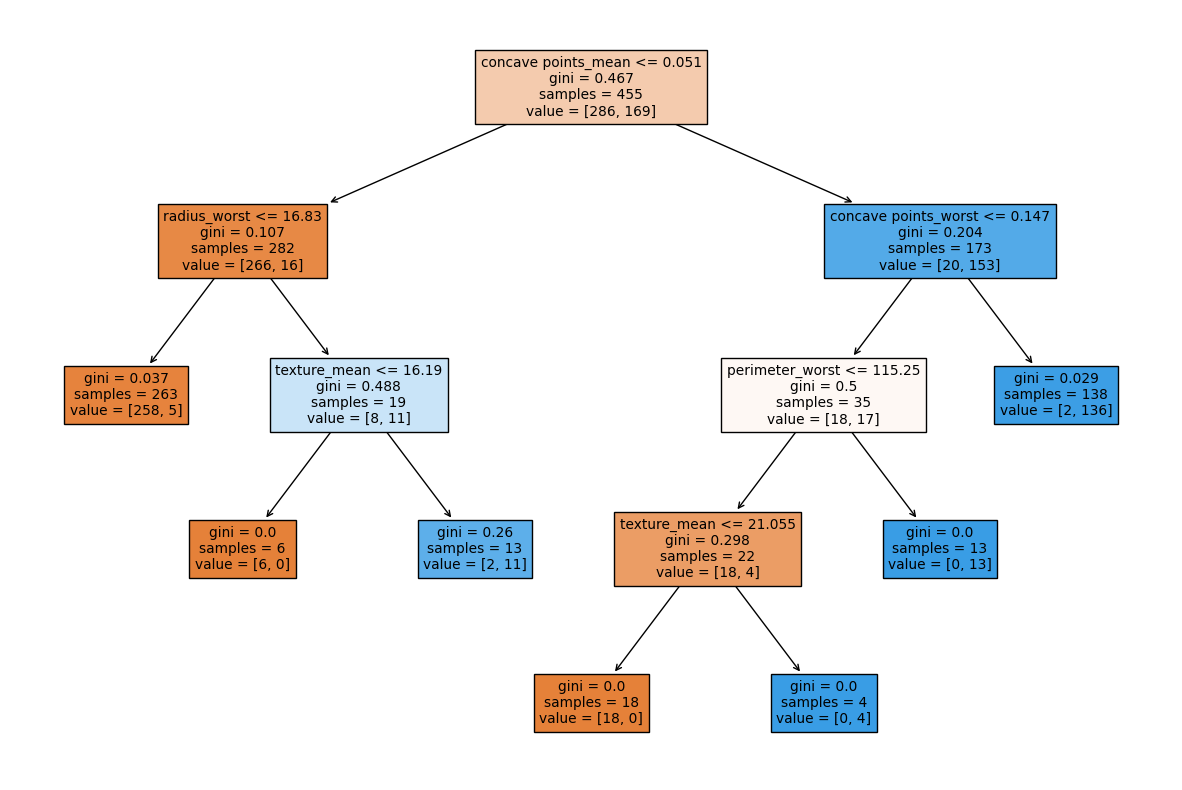

In [55]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBoost

In [56]:
import xgboost as xgb

In [57]:
xtrain

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [58]:
ytrain

,diagnosis
68,B
181,M
63,B
248,B
60,B
...,...
71,B
106,B
270,B
435,M


### Label encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)
print("ytrain encoded",ytrain_encoded)
print("ytest encoded",ytest_encoded)


ytrain encoded [0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 0 1 0]
ytest encoded [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 

### Random Search

In [61]:
# Define the model
xgb_model = xgb.XGBClassifier()

# Define parameters for random search
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42)
random_search.fit(xtrain, ytrain_encoded)

# Best parameters from random search
print("Best Parameters from Random Search:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END

### Grid search

In [62]:
# Update parameters for grid search based on random search results
best_params = random_search.best_params_
grid_params = {
    'learning_rate': [best_params['learning_rate']],
    'max_depth': [best_params['max_depth']],
    'n_estimators': [best_params['n_estimators']],
    'subsample': [best_params['subsample']]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid_params, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(xtrain, ytrain_encoded)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
Best Parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


### Evaluate Performance Before and After Tuning

In [63]:
# Before tuning
initial_model = xgb.XGBClassifier()
initial_model.fit(xtrain, ytrain_encoded)
y_pred_initial = initial_model.predict(xtest)
print("Accuracy Before Tuning:", accuracy_score(ytest_encoded, y_pred_initial))

# After tuning
tuned_model = xgb.XGBClassifier(**grid_search.best_params_)
tuned_model.fit(xtrain, ytrain_encoded)
y_pred_tuned = tuned_model.predict(xtest)
print("Accuracy After Tuning:", accuracy_score(ytest_encoded, y_pred_tuned))


Accuracy Before Tuning: 0.956140350877193
Accuracy After Tuning: 0.9736842105263158


# ADA Boost

In [64]:
# Define the model
ada_model = AdaBoostClassifier()

# Define parameters for random search
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}


# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=params, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42)
random_search.fit(xtrain, ytrain_encoded)

# Best parameters from random search
print("Best Parameters from Random Search:", random_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_es

In [65]:
# Update parameters for grid search based on random search results
best_params = random_search.best_params_
grid_params = {
    'n_estimators': [best_params['n_estimators'] - 10, best_params['n_estimators'], best_params['n_estimators'] + 10],
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=ada_model, param_grid=grid_params, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(xtrain, ytrain_encoded)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=90; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=90; total time=   0.1s
[CV] END ...................learning_rate=1, n_es

## Evaluate Performance Before and After Tuning

In [66]:
# Before tuning
initial_model = AdaBoostClassifier()
initial_model.fit(xtrain, ytrain_encoded)
y_pred_initial = initial_model.predict(xtest)
print("Accuracy Before Tuning:", accuracy_score(ytest_encoded, y_pred_initial))

# After tuning
tuned_model = AdaBoostClassifier(**grid_search.best_params_)
tuned_model.fit(xtrain, ytrain_encoded)
y_pred_tuned = tuned_model.predict(xtest)
print("Accuracy After Tuning:", accuracy_score(ytest_encoded, y_pred_tuned))


Accuracy Before Tuning: 0.9736842105263158
Accuracy After Tuning: 0.9736842105263158


# CatBoost

In [73]:
# declar the instanse of catboost class
from catboost import CatBoostClassifier

# Define the model
cat_model = CatBoostClassifier(verbose=0)

# Define parameters for random search
params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=params, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42)
random_search.fit(xtrain, ytrain_encoded)

# Best parameters from random search
print("Best Parameters from Random Search:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .........depth=4, iterations=300, learning_rate=0.2; total time=   0.3s
[CV] END .........depth=4, iterations=300, learning_rate=0.2; total time=   0.2s
[CV] END .........depth=4, iterations=300, learning_rate=0.2; total time=   0.2s
[CV] END .........depth=6, iterations=200, learning_rate=0.1; total time=   0.3s
[CV] END .........depth=6, iterations=200, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=6, iterations=200, learning_rate=0.1; total time=   0.3s
[CV] END ........depth=6, iterations=100, learning_rate=0.01; total time=   0.1s
[CV] END ........depth=6, iterations=100, learning_rate=0.01; total time=   0.1s
[CV] END ........depth=6, iterations=100, learning_rate=0.01; total time=   0.1s
[CV] END ........depth=8, iterations=200, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=8, iterations=200, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=8, iterations=200, learni

In [74]:
# Update parameters for grid search based on random search results
best_params = random_search.best_params_
grid_params = {
    'iterations': [best_params['iterations'] - 50, best_params['iterations'], best_params['iterations'] + 50],
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5],
    'depth': [best_params['depth'] - 1, best_params['depth'], best_params['depth'] + 1]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=cat_model, param_grid=grid_params, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(xtrain, ytrain_encoded)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .........depth=3, iterations=250, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=3, iterations=250, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=3, iterations=250, learning_rate=0.1; total time=   0.1s
[CV] END .........depth=3, iterations=250, learning_rate=0.2; total time=   0.2s
[CV] END .........depth=3, iterations=250, learning_rate=0.2; total time=   0.2s
[CV] END .........depth=3, iterations=250, learning_rate=0.2; total time=   0.2s
[CV] END depth=3, iterations=250, learning_rate=0.30000000000000004; total time=   0.1s
[CV] END depth=3, iterations=250, learning_rate=0.30000000000000004; total time=   0.2s
[CV] END depth=3, iterations=250, learning_rate=0.30000000000000004; total time=   0.2s
[CV] END .........depth=3, iterations=300, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=3, iterations=300, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=3, 

In [75]:
# Before tuning
initial_model = CatBoostClassifier(verbose=0)
initial_model.fit(xtrain, ytrain_encoded)
y_pred_initial = initial_model.predict(xtest)
print("Accuracy Before Tuning:", accuracy_score(ytest_encoded, y_pred_initial))

# After tuning
tuned_model = CatBoostClassifier(**grid_search.best_params_, verbose=0)
tuned_model.fit(xtrain, ytrain_encoded)
y_pred_tuned = tuned_model.predict(xtest)
print("Accuracy After Tuning:", accuracy_score(ytest_encoded, y_pred_tuned))


Accuracy Before Tuning: 0.9736842105263158
Accuracy After Tuning: 0.9649122807017544


In [76]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the model
cat_model = CatBoostClassifier(verbose=0)

# Define broader parameters for random search
params = {
    'iterations': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [3, 4, 5, 6, 7, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0.1, 0.2, 0.5, 1],
    'one_hot_max_size': [2, 10, 20],
    'rsm': [0.8, 1]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=params, n_iter=20, scoring='accuracy', cv=3, verbose=2, random_state=42)
random_search.fit(xtrain, ytrain_encoded)

# Best parameters from random search
print("Best Parameters from Random Search:", random_search.best_params_)

# Update parameters for grid search based on random search results
best_params = random_search.best_params_
grid_params = {
    'iterations': [best_params['iterations'] - 50, best_params['iterations'], best_params['iterations'] + 50],
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5],
    'depth': [best_params['depth'] - 1, best_params['depth'], best_params['depth'] + 1],
    'l2_leaf_reg': [best_params['l2_leaf_reg'] - 2, best_params['l2_leaf_reg'], best_params['l2_leaf_reg'] + 2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=cat_model, param_grid=grid_params, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(xtrain, ytrain_encoded)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Before tuning
initial_model = CatBoostClassifier(verbose=0)
initial_model.fit(xtrain, ytrain_encoded)
y_pred_initial = initial_model.predict(xtest)
print("Accuracy Before Tuning:", accuracy_score(ytest_encoded, y_pred_initial))

# After tuning
tuned_model = CatBoostClassifier(**grid_search.best_params_, verbose=0)
tuned_model.fit(xtrain, ytrain_encoded)
y_pred_tuned = tuned_model.predict(xtest)
print("Accuracy After Tuning:", accuracy_score(ytest_encoded, y_pred_tuned))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bagging_temperature=1, border_count=32, depth=7, iterations=400, l2_leaf_reg=3, learning_rate=0.05, one_hot_max_size=10, random_strength=1, rsm=0.8; total time=   0.6s
[CV] END bagging_temperature=1, border_count=32, depth=7, iterations=400, l2_leaf_reg=3, learning_rate=0.05, one_hot_max_size=10, random_strength=1, rsm=0.8; total time=   0.6s
[CV] END bagging_temperature=1, border_count=32, depth=7, iterations=400, l2_leaf_reg=3, learning_rate=0.05, one_hot_max_size=10, random_strength=1, rsm=0.8; total time=   0.6s
[CV] END bagging_temperature=1, border_count=128, depth=3, iterations=500, l2_leaf_reg=7, learning_rate=0.3, one_hot_max_size=10, random_strength=0.2, rsm=1; total time=   0.4s
[CV] END bagging_temperature=1, border_count=128, depth=3, iterations=500, l2_leaf_reg=7, learning_rate=0.3, one_hot_max_size=10, random_strength=0.2, rsm=1; total time=   0.3s
[CV] END bagging_temperature=1, border_count=128, dept